<a href="https://colab.research.google.com/github/imranrahman1997/TensorFlow-Course/blob/master/MNIST_dataset_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# define path
train_path = "/content/drive/My Drive/Dataset/train.csv"


In [3]:
train = pd.read_csv(train_path)


In [4]:
train.shape

(42000, 785)

In [5]:
x = train.iloc[:, 1:].values

In [6]:
y = train.iloc[:, 0].values

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [9]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
x_train.shape[1]

784

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

In [12]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape = (784,)),
                                    tf.keras.layers.Dense(20, activation= 'relu'),
                                    
                                    tf.keras.layers.Dense(20, activation = 'relu'),
                                    
                                    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [13]:
model.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [14]:
r = model.fit(x_train, y_train, epochs = 35, validation_data = (x_test, y_test))

Epoch 1/35
1050/1050 [==============================] - 3s 2ms/step - loss: 0.7692 - accuracy: 0.7776 - val_loss: 0.3838 - val_accuracy: 0.8938
Epoch 2/35
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3155 - accuracy: 0.9092 - val_loss: 0.3031 - val_accuracy: 0.9170
Epoch 3/35
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2476 - accuracy: 0.9277 - val_loss: 0.2629 - val_accuracy: 0.9273
Epoch 4/35
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2139 - accuracy: 0.9376 - val_loss: 0.2440 - val_accuracy: 0.9332
Epoch 5/35
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1904 - accuracy: 0.9438 - val_loss: 0.2321 - val_accuracy: 0.9355
Epoch 6/35
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1728 - accuracy: 0.9483 - val_loss: 0.2266 - val_accuracy: 0.9375
Epoch 7/35
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1586 - accuracy: 0.9531 - val_loss: 0.2200 - val_accuracy:

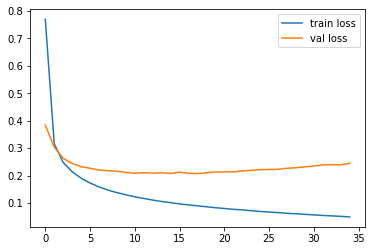

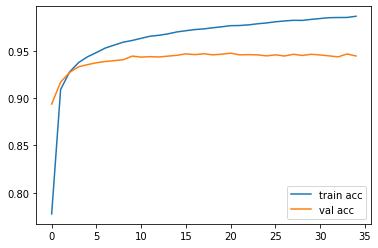

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
test_path = '/content/drive/My Drive/Dataset/test.csv'
test_path = pd.read_csv(test_path)

In [17]:
test = test_path.values

In [18]:
test = sc.transform(test)

In [19]:
prediction = model.predict(test)

In [20]:
prediction

array([[2.7718344e-13, 2.8007312e-15, 1.0000000e+00, ..., 1.7064429e-10,
        1.4785493e-12, 3.9988768e-14],
       [9.9983490e-01, 8.3166850e-12, 2.0707575e-06, ..., 3.0626381e-08,
        9.5750493e-06, 1.6612390e-07],
       [5.4424621e-08, 4.8892882e-05, 2.5512639e-04, ..., 5.2073359e-05,
        3.0171957e-03, 9.9206924e-01],
       ...,
       [8.1189066e-12, 4.6350707e-10, 5.4563853e-11, ..., 3.2951038e-11,
        2.3924385e-09, 4.5236709e-07],
       [2.9408964e-08, 1.3618097e-09, 1.4436294e-07, ..., 1.2273683e-04,
        8.9481676e-07, 9.9118739e-01],
       [1.5353484e-10, 4.8827273e-13, 1.0000000e+00, ..., 3.6268360e-11,
        1.7165243e-09, 2.2432416e-12]], dtype=float32)

In [21]:
print(np.argmax(prediction, axis = 1))

[2 0 9 ... 3 9 2]
